In [122]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from jupyterthemes import jtplot
import luit as lt

jtplot.style(theme='grade3')

In [123]:
#User-supplied
#obsfile = '/glade/p/work/manab/fcast/data/dly/obsflow.dly.HHDW1.csv'
summaoutfile = '/glade/p/work/manab/fcast/HHDW1/output/hhdw1/final.nc'
routefile = '/glade/p/work/manab/fcast/PNW_route/output/17003600_out.nc'
polyshp = '/glade/p/work/manab/fcast/data/shapefile/Region_17_merged_hru.shp'
segshp =  '/glade/p/work/manab/fcast/data/shapefile/Region17_merged_seg.shp'

In [124]:
summaout = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')
routeout = xr.open_dataset(routefile)

#Polygon shapefile
hrus = summaout['hru'].values
polydat = lt.subShp(polyshp, 'hru_id2', hrus)

#Reach shapefile
reaches = routeout['reachID'].values
segdat = lt.subShp(segshp, 'seg_id2', reaches)
polydat.head()

,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry
7341,7342,23977768,17d,1227.0,17007385,2.940304e+06,-1.909476e+06,8.052212e+06,17003605,1216.66376,-121.34689,47.14868,POLYGON ((-121.3017482329586 47.14459738039864...
7342,7343,23977768,17d,1111.0,17007386,2.940982e+06,-1.908705e+06,5.352517e+06,17003605,1120.52838,-121.33949,47.15643,"POLYGON ((-121.3015899656361 47.1452178951329,..."
7380,7381,23977756,17d,1121.0,17007424,2.942993e+06,-1.913681e+06,3.664245e+07,17003604,1098.19608,-121.40942,47.16211,"POLYGON ((-121.375434961942 47.17855680697091,..."
7386,7387,23977740,17d,984.0,17007430,2.946059e+06,-1.918558e+06,5.659188e+07,17003603,975.89110,-121.48177,47.17717,"POLYGON ((-121.455417933194 47.21600741638544,..."
7403,7404,23977730,17d,923.0,17007447,2.948725e+06,-1.924887e+06,3.216996e+07,17003602,932.27742,-121.57115,47.18523,POLYGON ((-121.6086431045736 47.22415006191947...


In [125]:
#summaout.sel(time=slice('2011-01-01', '2011-01-01'))['pptrate'].to_dataframe()
summasel = summaout.isel(time = 50)['pptrate'].drop('time').to_dataframe()
summasel['hru_id2'] = summasel.index
polydat = pd.merge(polydat, summasel)

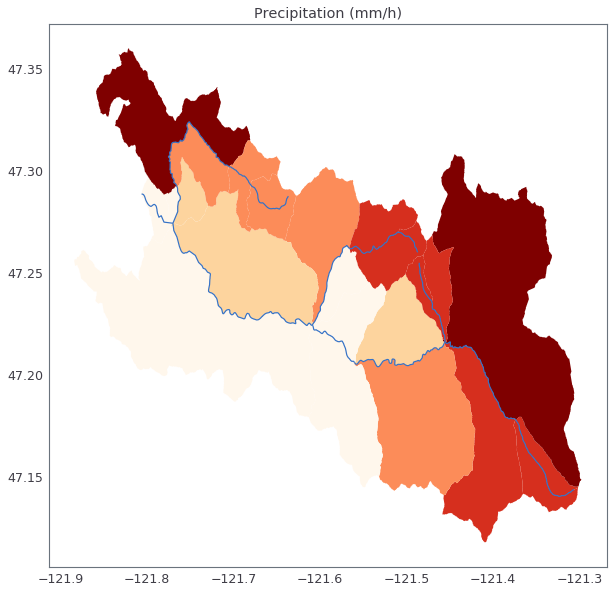

In [134]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Precipitation (mm/h)')
polydat.plot(ax = ax, column = 'pptrate', cmap='OrRd', scheme='fisher_jenks', label='name')
#ax.legend()
segdat.plot(ax = ax)
ax.grid(False)